# Airline Satisfaction Dataset

## Task: 
We work as data scientists at an airline and we have been asked to build a model for predicting the passengers' satisfaction based on the services our airline provides. The services, among other variables, are the features of the dataset. It is a binary classification problem because the passengers can be neutral/dissatisfied or satisfied. 

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Seaborn for plotting and styling
import seaborn as sns

### Prepare the data

In [29]:
#read the train and test files
train_path= "C:/Users/manio/Desktop/ml2/train.csv"
test_path =  "C:/Users/manio/Desktop/ml2/test.csv"
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [30]:
df = pd.DataFrame(train_data)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [31]:
df.shape

(103904, 25)

In [32]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [33]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [34]:
df.groupby('satisfaction').size()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
dtype: int64

In [35]:
combined_df = pd.concat([train_data, test_data], ignore_index= True)
combined_df.to_csv("combined_dataset.csv", index=False)
print("Datasets combined successfully into combine_dataset.csv")
print(combined_df)
combined_df.shape

Datasets combined successfully into combine_dataset.csv
        Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
129875       25971   78463    Male  disloyal Customer   34  Business travel   
129876       25972   71167    Male     Loyal Customer   23  Business travel   
129877       25973   37675  Female     Loyal Customer   17  Personal Travel   
129878       25974   90086    Male     Loyal Customer   14  Business travel   
129879       25975   34799  Female     Loyal Customer   42  Personal Travel

(129880, 25)

In [36]:
#We droped the columns Unnamed:0 and id, because it was not informative.
combined_df = combined_df.drop(columns=['Unnamed: 0', 'id'])

In [37]:
#We round the statistics returned from the describe function to two decimal points
combined_df.describe().round(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,39.43,1190.32,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.71,15.09
std,15.12,997.45,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.07,38.47
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [38]:
#We check which columns have NaNs
combined_df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [39]:
missing_values = combined_df[combined_df['Arrival Delay in Minutes'].isna()]['Arrival Delay in Minutes'].tolist()

print("Missing values in column '{}':".format('Arrival Delay in Minutes'), missing_values)

Missing values in column 'Arrival Delay in Minutes': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [40]:
#We replaced the missing values with the mean of the column
combined_df['Arrival Delay in Minutes'] = combined_df['Arrival Delay in Minutes'].fillna(combined_df['Arrival Delay in Minutes'].mean().round(2))

In [41]:
#We check again for missing values.
combined_df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [42]:
#We want to transform categorical columns into numeric represantations (0, 1, 2)
#Female= 0 Male=1
combined_df['Gender'] = combined_df['Gender'].map({'Male': 1, 'Female': 0})
#Loyal Customer= 1 disloyal Customer = 0
combined_df['Customer Type'] = combined_df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
#Personal Travel = 1 Business Travel = 0
combined_df['Type of Travel'] = combined_df['Type of Travel'].map({'Personal Travel': 1, 'Business travel': 0})
#Business = 0 Eco = 1 Eco plu = 2
combined_df['Class'] = combined_df['Class'].map({'Business': 0, 'Eco': 1, 'Eco Plus': 2})
#Neutral or dissatisfied: 0 Satisfied:1
combined_df['satisfaction'] = combined_df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

combined_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Exploratory Data Analysis

In [43]:
#We summarise the distribution of attributes for the two classes. 
#It is important to see how balanced the class values are.
grouped_data= combined_df.groupby('satisfaction').size().reset_index(name='Count')
grouped_data['Percentage(%)']= (grouped_data['Count']/len(combined_df))*100
print(grouped_data)

   satisfaction  Count  Percentage(%)
0             0  73452      56.553742
1             1  56428      43.446258


From the transformation we did at the categorical target column we know that Class 0 represents Neutral/Dissatisfied passengers  and Class 1 represents Satisfied passengers.

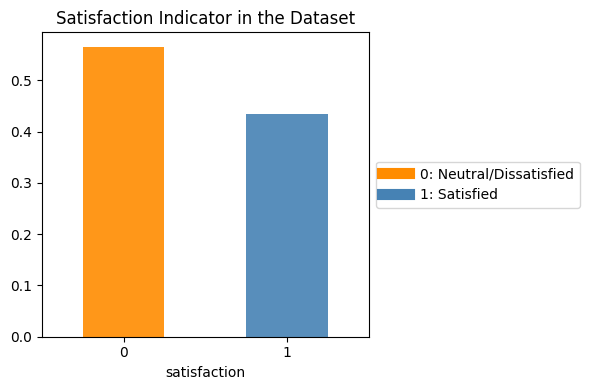

In [44]:
#We made a plot for the two classes for visualization.
figure1 = plt.figure(figsize = (6,4))
combined_df.satisfaction.value_counts(normalize=True).plot(kind='bar', color=['darkorange', 'steelblue'], alpha = 0.9, rot = 0)
plt.title('Satisfaction Indicator in the Dataset')
handles = [
    plt.Line2D([0], [0], color='darkorange', lw=8),
    plt.Line2D([0], [0], color='steelblue', lw=8)
]
plt.legend(
    handles, 
    ['0: Neutral/Dissatisfied', '1: Satisfied'], 
    loc='center left', 
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

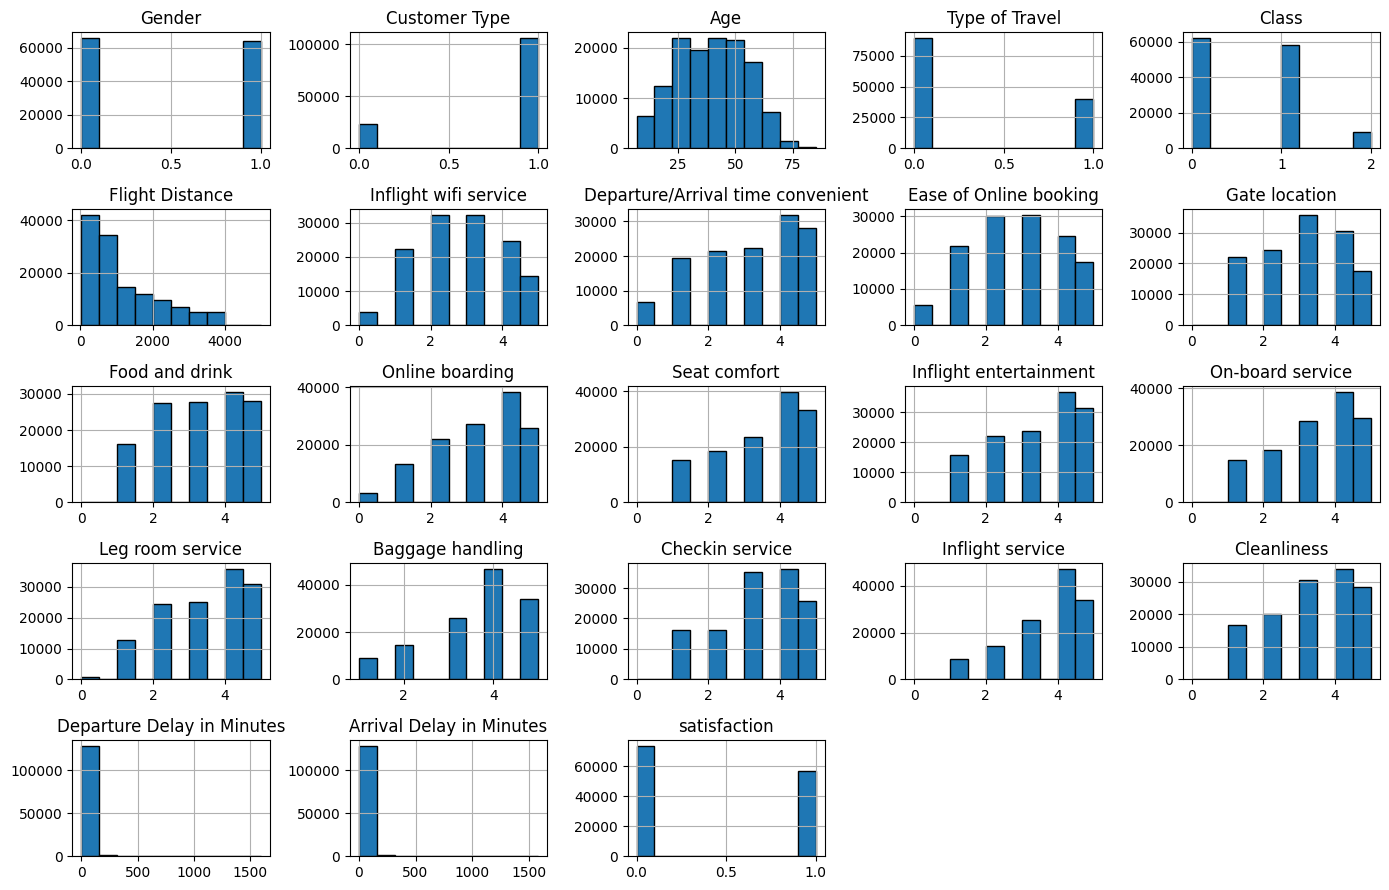

In [45]:
histogram = combined_df.hist(figsize=(14,9), edgecolor='black')
plt.tight_layout()
plt.show()

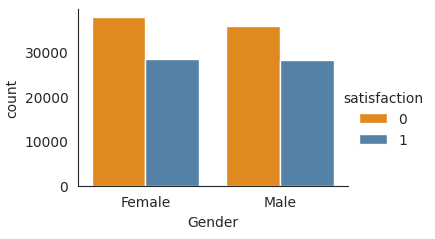

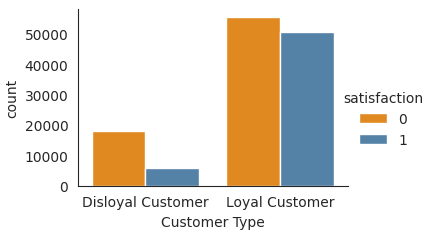

In [46]:
custom_palette= {0: "darkorange", 1:"steelblue"}
with sns.axes_style(style = 'white'):
  figure3 = sns.catplot(x="Gender", data=combined_df, kind="count", height = 2.5, aspect=1.5, hue="satisfaction", palette = custom_palette)
  figure3.set_xticklabels(['Female', 'Male'])
  figure4 = sns.catplot(x="Customer Type", data=combined_df, kind="count", height = 2.5, aspect=1.5, hue="satisfaction", palette = custom_palette)
  figure4.set_xticklabels(['Disloyal Customer', 'Loyal Customer'])
plt.show()

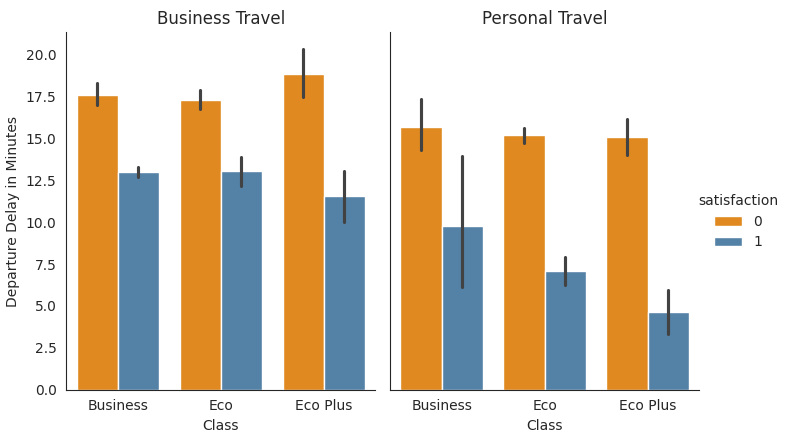

In [47]:
with sns.axes_style('white'):
    figure5= sns.catplot (x="Class", y= "Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=combined_df, kind="bar", height=4.5, aspect=.8, palette = custom_palette)
    figure5.set_xticklabels(['Business', 'Eco', 'Eco Plus'])
    titles ={0: "Business Travel", 1: "Personal Travel"}
    for ax, col_value in zip(figure5.axes.flat, figure5.col_names):
        ax.set_title(titles[int(col_value)])
plt.show()

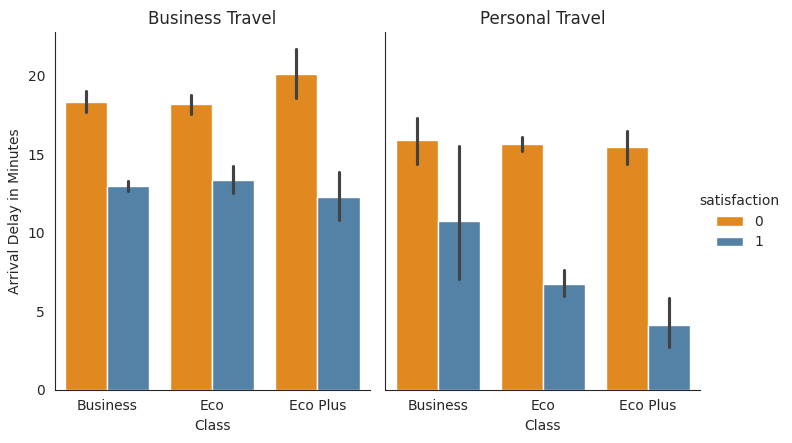

In [48]:
with sns.axes_style('white'):
    figure6= sns.catplot (x="Class", y= "Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=combined_df, kind="bar", height=4.5, aspect=.8, palette = custom_palette)
    figure6.set_xticklabels(['Business', 'Eco', 'Eco Plus'])
    titles ={0: "Business Travel", 1: "Personal Travel"}
    for ax, col_value in zip(figure6.axes.flat, figure6.col_names):
        ax.set_title(titles[int(col_value)])
plt.show()

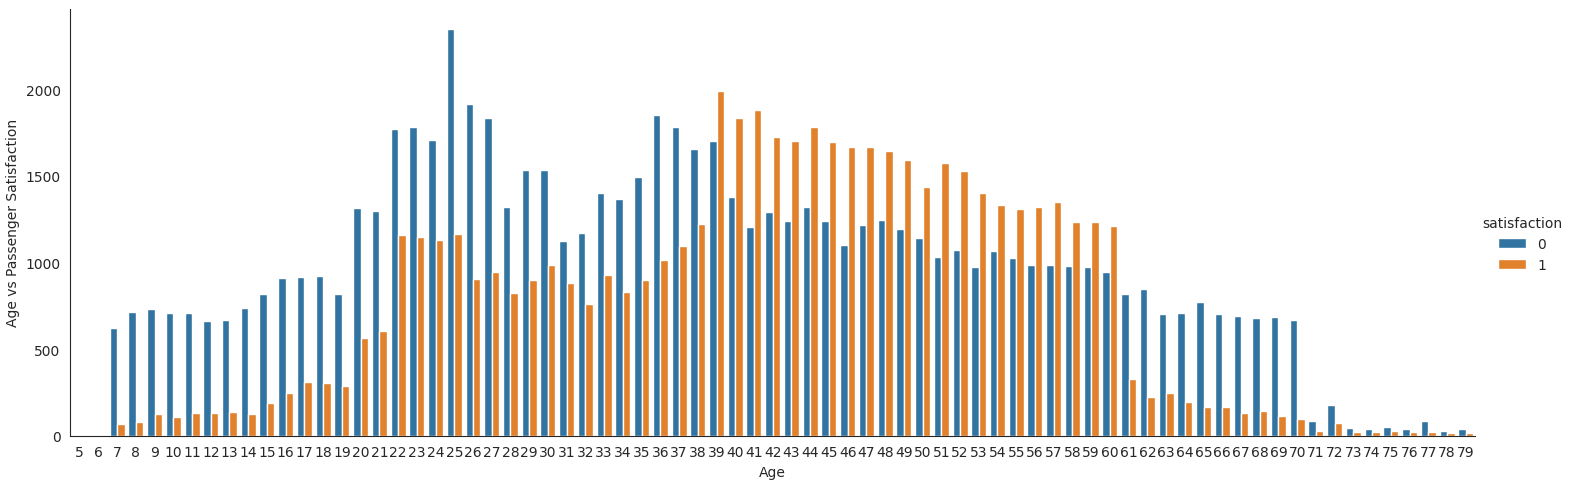

In [49]:
with sns.axes_style('white'):
    figure2 = sns.catplot(x="Age", data = combined_df, aspect= 3.0, kind='count', hue = 'satisfaction', order=range(5, 80))
    figure2.set_ylabels('Age vs Passenger Satisfaction')
                          

The ratio of dissatisfied passengers is significantly higher than satisfied passengers in the age groups of 7–38 and 61–79. Conversely, in the age range of 39–60, the ratio of satisfied passengers exceeds that of dissatisfied passengers.

<Axes: >

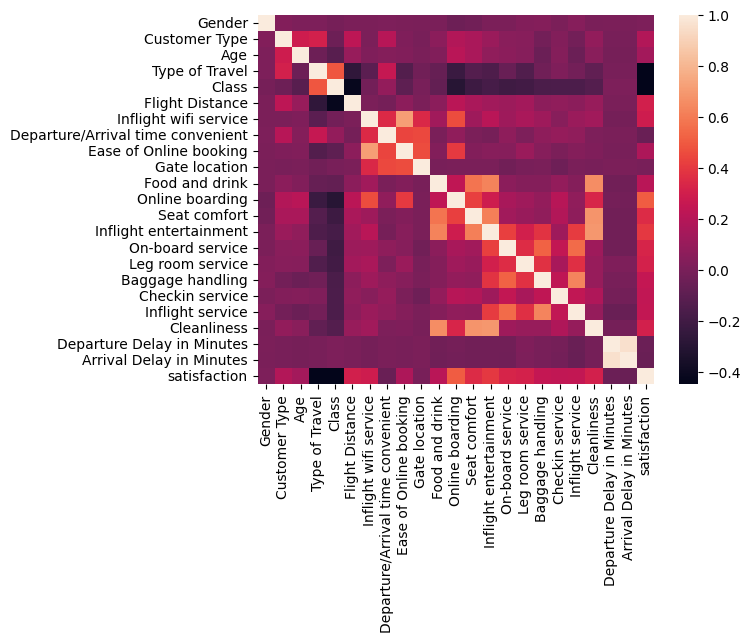

In [50]:
#We check to see the correlation among features. 
sns.heatmap(combined_df.corr())

Before we proceed to outliers handling, feature engineering and model training we need to split the data to train and test set.
We will do all of the above only in the train data.
The test dataset is exclusively for final model evaluation.

### Data Standardization

In [51]:
from sklearn.model_selection import train_test_split
             
train_df = combined_df
# Perform train-test split
train_df, test_df= train_test_split(train_df, test_size=0.2, random_state=35)

In [52]:
from sklearn.preprocessing import StandardScaler

features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = ['satisfaction']

# Split into test and train
x_train = train_df[features]
y_train = train_df[target].to_numpy()
x_test = test_df[features]
y_test = test_df[target].to_numpy()
# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
#array to dataframe
X_train_df = pd.DataFrame(X_train, columns=features)
X_test_df = pd.DataFrame(X_test, columns=features)

<Axes: >

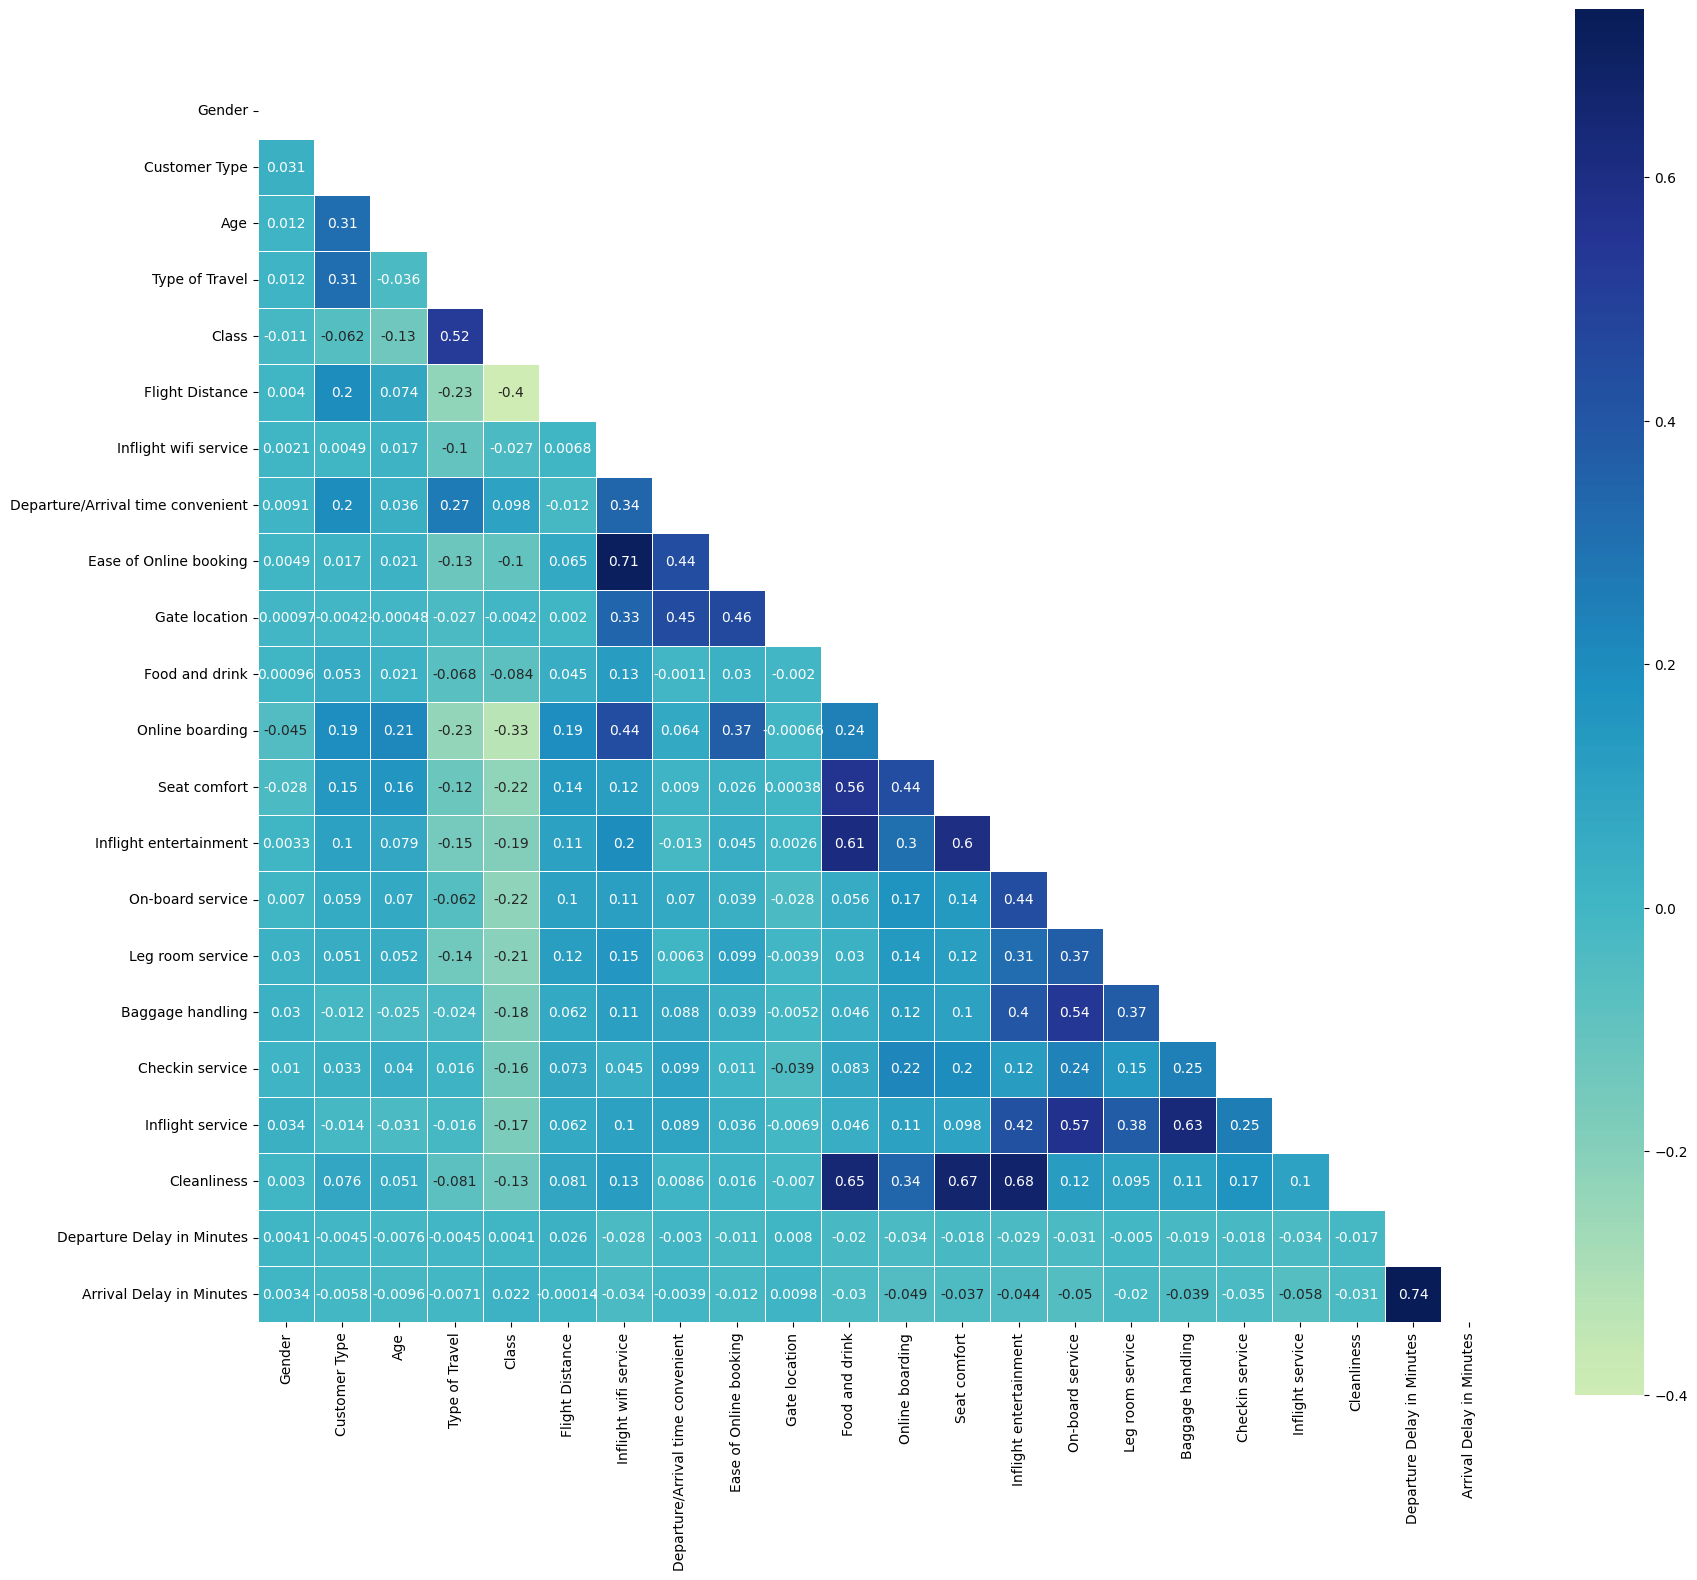

In [53]:
#corelation matrix
corr = X_train_df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

## Outliers Detection

In [54]:
def calculate_outliers_percentage(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # We calculated the interquartile range (IQR) for each column
    IQR = Q3 - Q1   

    #We calculated the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR

    #We calculated the number and the percentage for outliers in each column
    outliers = ((df < lower_bound) | (df > upper_bound)).sum()
    percentage_outliers = (outliers/len(df)) * 100
    
    return percentage_outliers.to_dict()

    

In [55]:
outliers_percentage = calculate_outliers_percentage(X_train_df)
train_outliers = pd.DataFrame(list(outliers_percentage.items()), columns=['Column Name', '% Outliers'])
train_outliers.reset_index(drop= True, inplace = True)
print(train_outliers)

                          Column Name  % Outliers
0                              Gender    0.000000
1                       Customer Type   18.423737
2                                 Age    0.000000
3                      Type of Travel    0.000000
4                               Class    0.000000
5                     Flight Distance    2.178934
6               Inflight wifi service    0.000000
7   Departure/Arrival time convenient    0.000000
8              Ease of Online booking    0.000000
9                       Gate location    0.000000
10                     Food and drink    0.000000
11                    Online boarding    0.000000
12                       Seat comfort    0.000000
13             Inflight entertainment    0.000000
14                   On-board service    0.000000
15                   Leg room service    0.000000
16                   Baggage handling    0.000000
17                    Checkin service   12.418194
18                   Inflight service    0.003850


In [56]:
outliers_percentage = calculate_outliers_percentage(X_test_df)
test_outliers = pd.DataFrame(list(outliers_percentage.items()), columns=['Column Name', '% Outliers'])
test_outliers.reset_index(drop= True, inplace = True)
print(test_outliers)


                          Column Name  % Outliers
0                              Gender    0.000000
1                       Customer Type   17.851093
2                                 Age    0.000000
3                      Type of Travel    0.000000
4                               Class    0.000000
5                     Flight Distance    2.309824
6               Inflight wifi service    0.000000
7   Departure/Arrival time convenient    0.000000
8              Ease of Online booking    0.000000
9                       Gate location    0.000000
10                     Food and drink    0.000000
11                    Online boarding    0.000000
12                       Seat comfort    0.000000
13             Inflight entertainment    0.000000
14                   On-board service    0.000000
15                   Leg room service    0.000000
16                   Baggage handling    0.000000
17                    Checkin service   12.342162
18                   Inflight service    0.003850


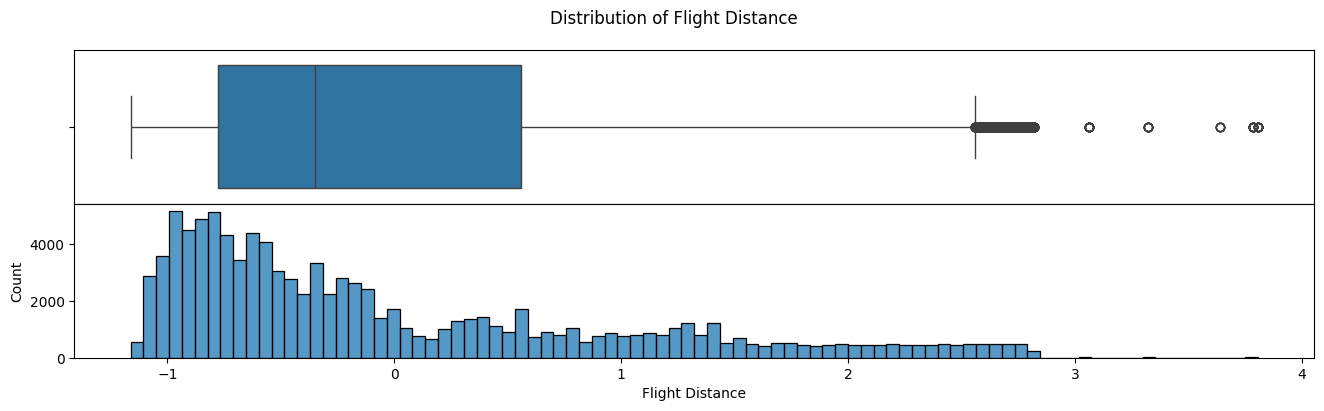

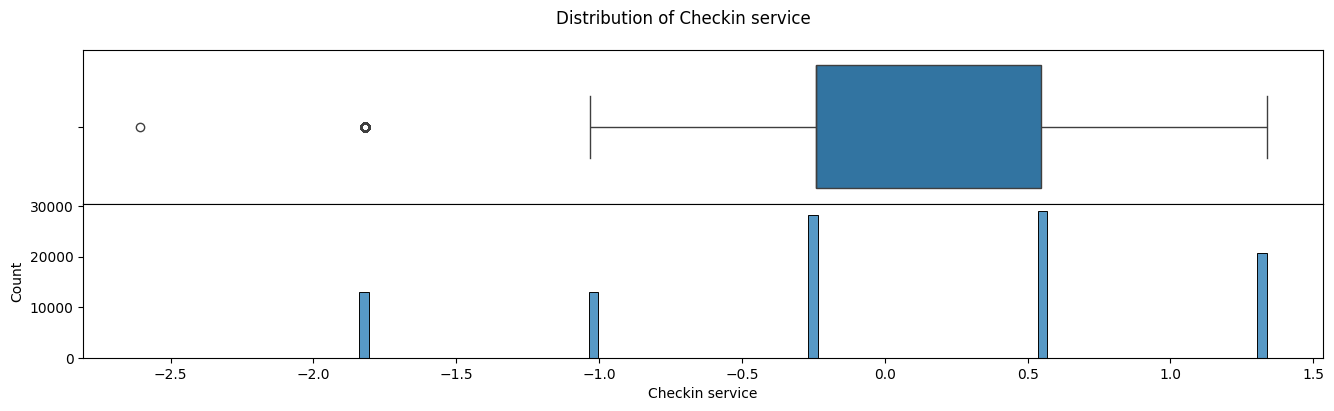

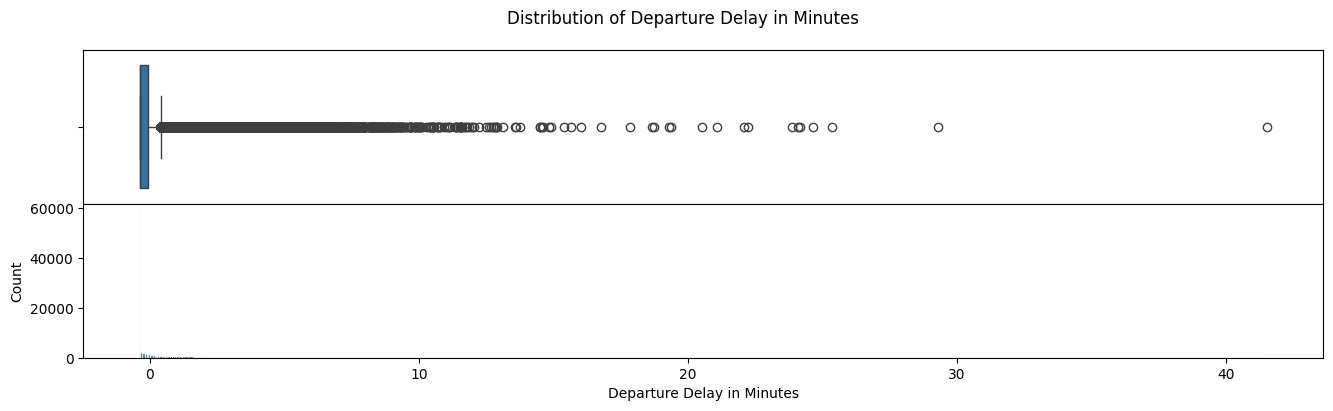

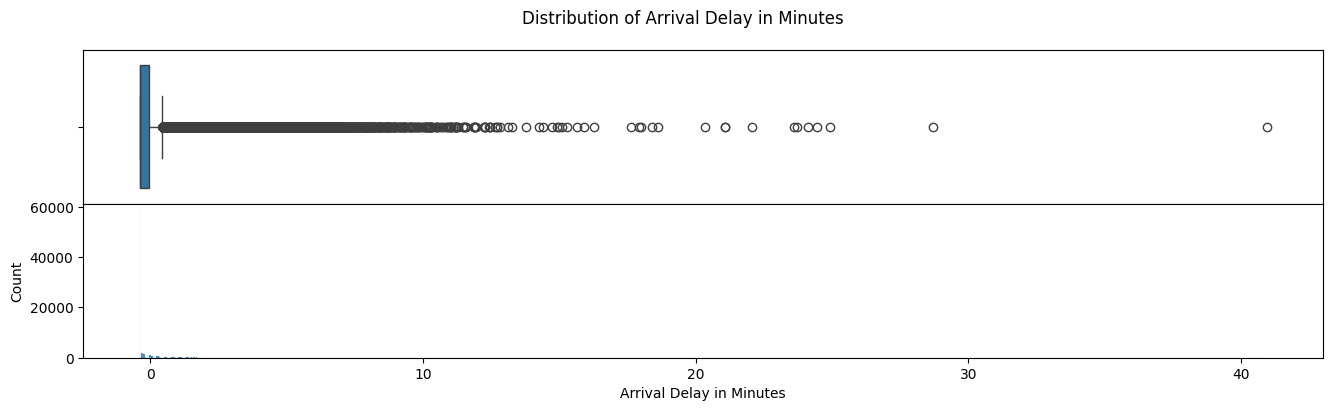

In [57]:
#We used boxplots and histograms for the columns that had outliers in the train data.
include_cols = [ 'Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
numerical = X_train_df[include_cols]


for col in numerical.columns:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data=X_train_df, x=col, ax=ax1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data=X_train_df, x=col, ax=ax2)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()



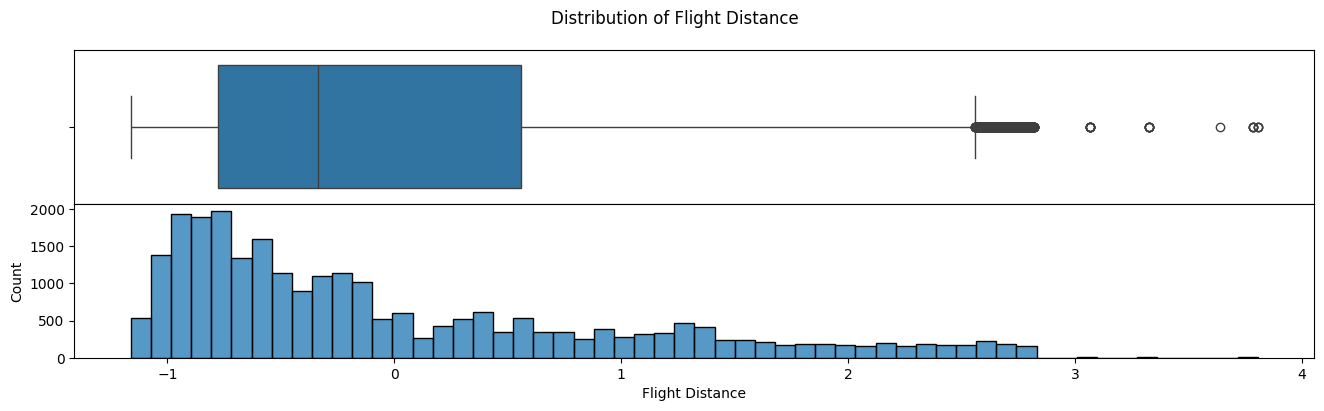

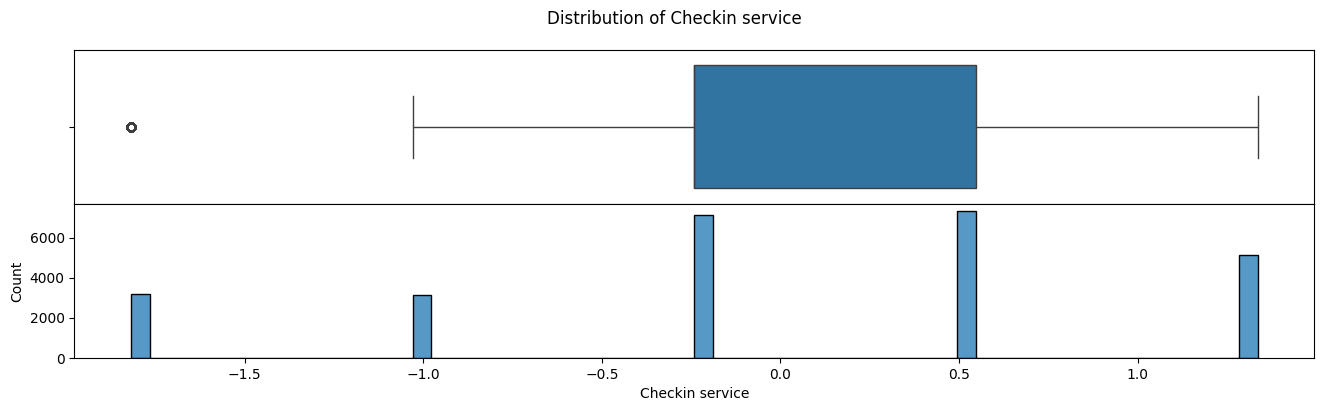

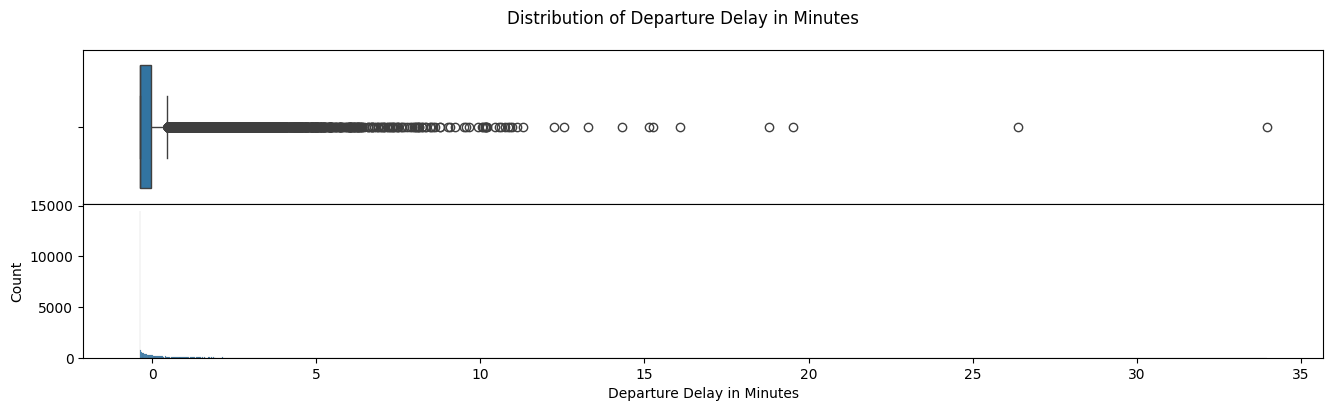

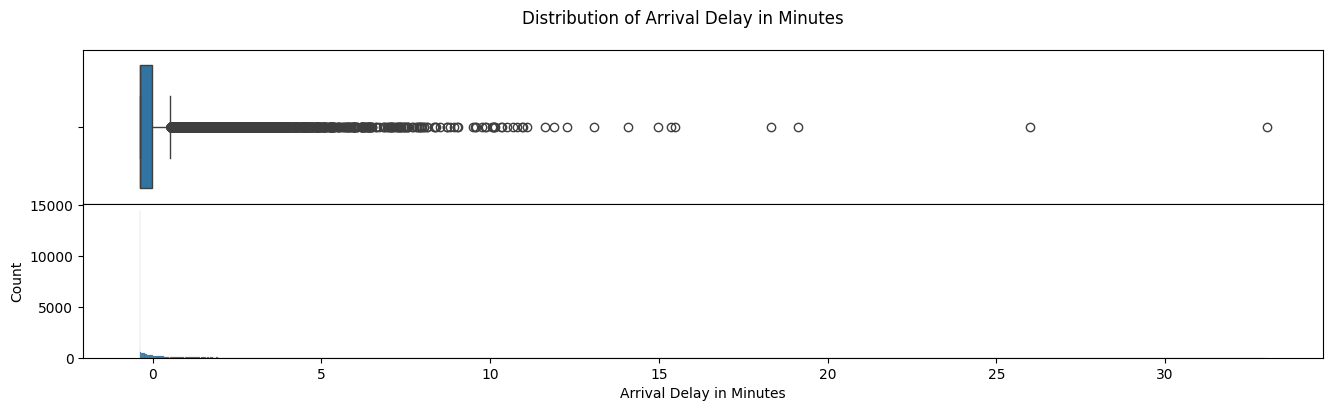

In [58]:
#We used boxplots and histograms for the columns that had outliers in the test data.
include_cols = [ 'Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
numerical = X_test_df[include_cols]
for col in numerical.columns:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data = X_test_df, x=col, ax=ax1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data = X_test_df, x=col, ax=ax2)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

We have outliers in four columns: Flight Distance ~ 2.27%, Checkin service ~ 12.43%, Departure Delay in Minutes ~ 13.99% , Arrival Delay in Minutes ~ 13.47% 
> We will drop outliers in 'Flight Distance' column because we will lose only a small percentage of information from the dataset
> We will leave the outliers in the 'Checkin service' column because they contain information about the satisfaction of the passengers. If a passenger will rate 0 the cheking service, he probably will be less satisfied with the overall experience.
> We will handle outliers in 'Departure Delay in Minutes' column with Winsorization (Capping).


## Outliers Handling

#### Drop Outliers in Train and Cap Outliers in Test

In [ ]:
#First, we drop the outliers from the 'Flight Distance' column in the X_train dataset
def calculate_outliers_bounds(df,col):

    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def apply_outlier_bounds(df, col, lower_bound, upper_bound):
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df
# compine x_train and y_train
X_train_df['satisfaction'] = y_train

#We calculate outlier bounds from X_train and drop them
lower_bound, upper_bound = calculate_outliers_bounds(X_train_df, 'Flight Distance')
train_clean = X_train_df[(X_train_df['Flight Distance'] >= lower_bound) & (X_train_df['Flight Distance'] <= upper_bound)]


#split the target variable from the features
y_train_df = train_clean['satisfaction']
train_clean = train_clean.drop(columns=['satisfaction'])


print("Number of rows before removing outliers:", len(X_train_df))
print("Number of rows after removing outliers:", len(train_clean))
#We transform X_test using the same bounds BUT we do not drop the outliers 
x_test_to_transform = X_test_df.copy()
test_transformed = apply_outlier_bounds(x_test_to_transform, 'Flight Distance', lower_bound, upper_bound)
print("Number of rows before removing outliers:", len(X_test_df))
print("Number of rows after removing outliers:", len(test_transformed))

(101640, 23)
(101640,)
Number of rows before removing outliers: 103904
Number of rows after removing outliers: 101640
Number of rows before removing outliers: 25976
Number of rows after removing outliers: 25976


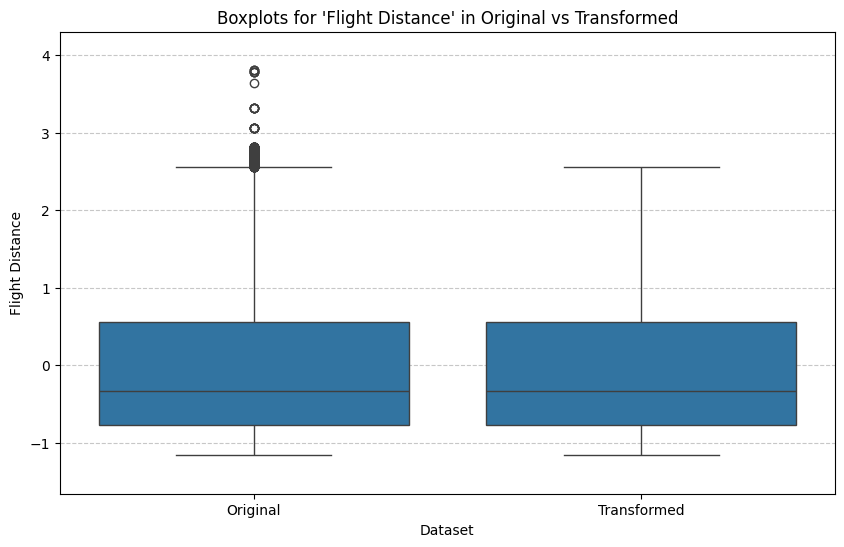

In [60]:
def plot_boxplots(original, transformed, column_name):
    # Prepare data for plotting
    data = {
        'Original': original[column_name],
        'Transformed': transformed[column_name]
    }
    
    # We convert data to long format for Seaborn
    plot_data = pd.DataFrame(data).melt(var_name='Dataset', value_name='Value')

    #We calculate dynamic limits for the y-axis
    data_min = plot_data['Value'].min()
    data_max = plot_data['Value'].max()
    margin = (data_max - data_min) * 0.1  # Add 10% margin
    
    # Create boxplots
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Dataset', y='Value', data=plot_data)
    plt.title(f"Boxplots for '{column_name}' in Original vs Transformed")
    plt.ylabel(column_name)
    plt.xlabel("Dataset")
    plt.ylim(data_min - margin, data_max + margin)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage
plot_boxplots(X_test_df, test_transformed, column_name='Flight Distance')

#### Winsorization for outliers

We will use Winsorization (Capping) on the training set.
We will find the thresholds on the training set to avoid data leakage. 

In [61]:
column_with_outliers = ['Departure Delay in Minutes']
#We compute the thresholds on the training set
column_with_outliers = 'Departure Delay in Minutes'
lower_limit = train_clean[column_with_outliers].quantile(0.01)
upper_limit = train_clean[column_with_outliers].quantile(0.99)

#We apply the thresholds to the training set to cap the outliers
train_clean[column_with_outliers] = train_clean[column_with_outliers].clip(lower = lower_limit, upper = upper_limit)

#We apply the thresholds to the test set to cap the outliers
test_transformed[column_with_outliers] = test_transformed[column_with_outliers].clip(lower = lower_limit, upper = upper_limit)

print("Training set:")
print(train_clean[column_with_outliers].describe())

print("Test set:")
print(test_transformed[column_with_outliers].describe())


Training set:
count    101640.000000
mean         -0.023854
std           0.808193
min          -0.385601
25%          -0.385601
50%          -0.385601
75%          -0.069776
max           4.325455
Name: Departure Delay in Minutes, dtype: float64
Test set:
count    25976.000000
mean        -0.014592
std          0.817229
min         -0.385601
25%         -0.385601
50%         -0.385601
75%         -0.043458
max          4.325455
Name: Departure Delay in Minutes, dtype: float64


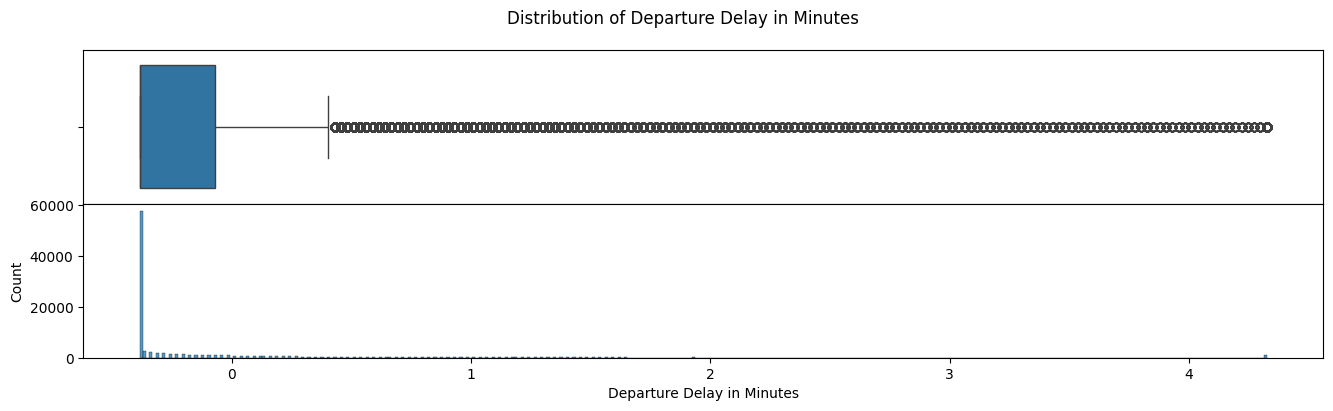

In [62]:
include_cols = ['Departure Delay in Minutes']
numerical = train_clean[include_cols]

for col in numerical.columns:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data = train_clean, x=col, ax=ax1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data = train_clean, x=col, ax=ax2)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

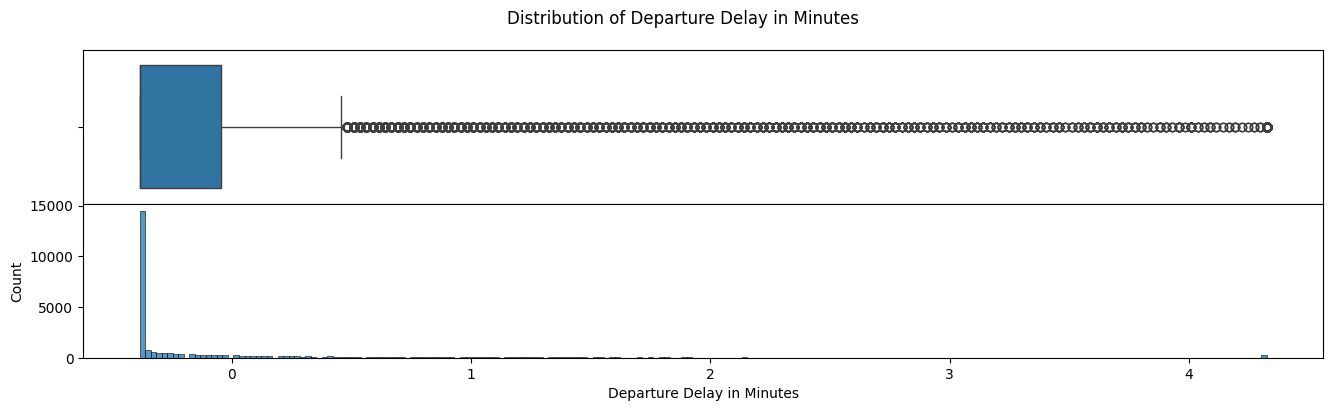

In [63]:
include_cols = ['Departure Delay in Minutes']
numerical = test_transformed[include_cols]

for col in numerical.columns:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data = test_transformed, x=col, ax=ax1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data = test_transformed, x=col, ax=ax2)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

## Feature Selection

Text(0.5, 1.0, 'Data correlations')

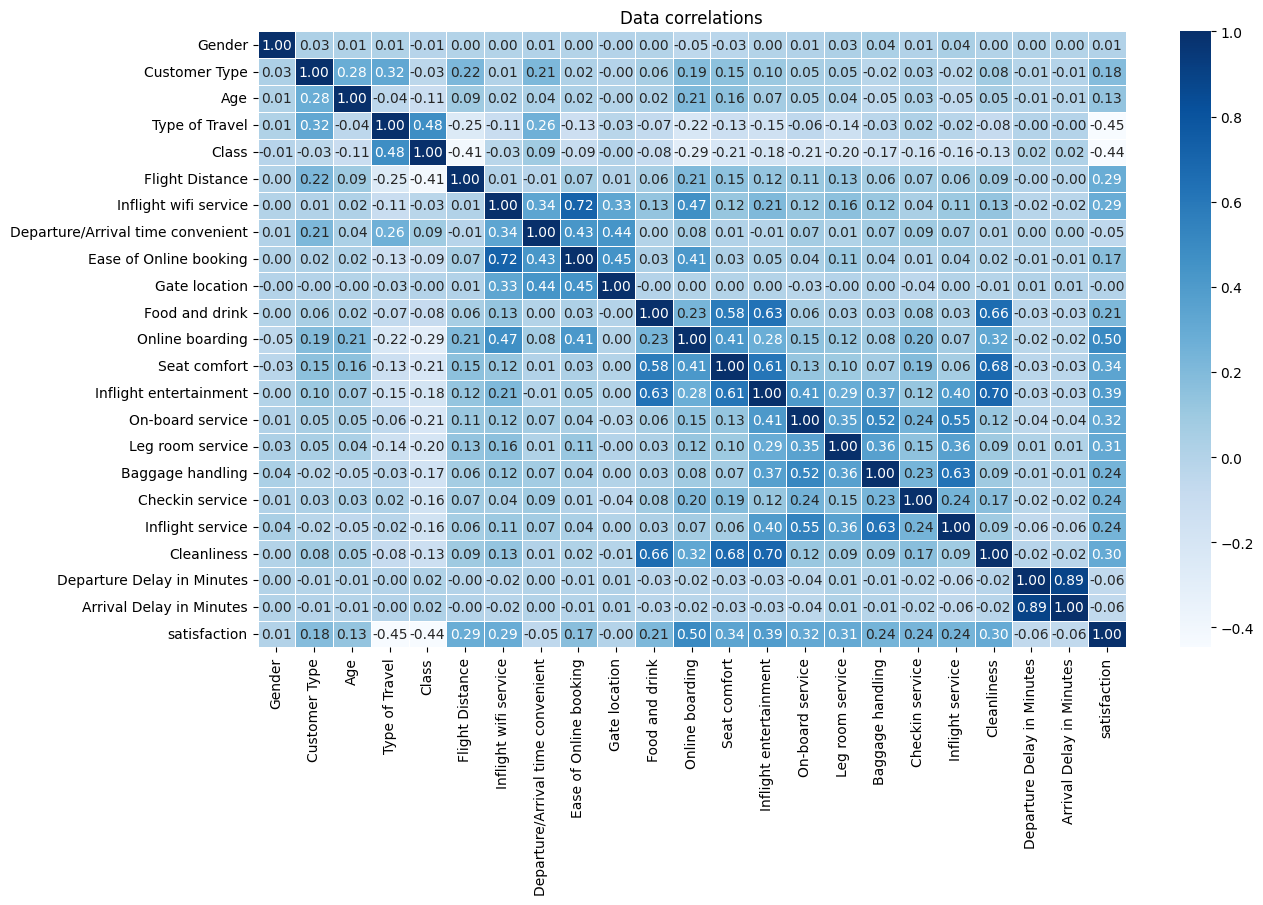

In [68]:
#correlation matrix
#copy the train_clean dataset
train_clean_corr = train_clean.copy()
#add the satisfaction variable
train_clean_corr['satisfaction'] = y_train_df
correlation = train_clean_corr.corr()
plt.figure(figsize = (14, 8))
sns.heatmap(correlation, annot= True, fmt = '.2f', annot_kws={'size':10}, linewidths = 0.5, cmap='Blues')
plt.title("Data correlations")

From the above correlation matrix we decided to drop the columns Gender, Gate Location, Departure/Arrival time convenient and Arrival Delay in Minutes. The features Gender and Departure/Arrival time convenient has very low correlation with the target feature, 0.01 and -0.05 respectively. The feature Gate Location has 0 correlation with the target variable. The feature Arrival Delay in Minutes is highly correlated with the Departure Delay in Minutes, so we decided to keep one of these features. The high correlation between these features makes sense because the more time it takes to take off, the longer it will take to arrive at its destination.


In [69]:
# drop the columns gender, Arrival Delay in Minutes, Gate location, Departure/Arrival time convenient
train_clean = train_clean.drop(columns=['Gender', 'Arrival Delay in Minutes', 'Gate location', 'Departure/Arrival time convenient'])
test_transformed = test_transformed.drop(columns=['Gender', 'Arrival Delay in Minutes', 'Gate location', 'Departure/Arrival time convenient'])
print(train_clean.head())

   Customer Type       Age  Type of Travel     Class  Flight Distance  \
0       0.475233  0.831885        1.495824  0.653179         0.114143   
1      -2.104229  0.302609       -0.668528  0.653179        -0.463665   
2      -2.104229 -0.954423       -0.668528  0.653179        -1.083605   
3       0.475233  0.434928        1.495824  0.653179        -0.853886   
4       0.475233 -2.012976        1.495824  0.653179         0.420100   

   Inflight wifi service  Ease of Online booking  Food and drink  \
0               0.957350                0.888757        0.597172   
1               0.205047                0.175516        0.597172   
2              -0.547256               -0.537725       -0.154631   
3               0.205047                1.601998        0.597172   
4               0.205047                0.175516        0.597172   

   Online boarding  Seat comfort  Inflight entertainment  On-board service  \
0         0.554697      0.423404                0.480510          0.477975

#### Recrusive feature Elimination

In [70]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train_clean
y = y_train_df

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

#we drop the columns that are not important in a new dataframe
train_clean_rfe = train_clean[features]
test_transformed_rfe = test_transformed[features]

# drop the columns from test_transformed_rfe that are not in train_clean_rfe
test_transformed_rfe = test_transformed_rfe[train_clean_rfe.columns]



['Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Inflight entertainment']
[0.04455968 0.03592413 0.10893412 0.09721577 0.03986705 0.15388137
 0.03862257 0.01130368 0.17369813 0.05099152 0.06352314 0.02992382
 0.03346632 0.02473401 0.02576566 0.02599042 0.02657453 0.01502409]


### Model Selection

In [42]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
print(X_train)
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    # define the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    return model, roc_auc

[[ 1.01786827  0.47523341  0.83188524 ...  0.54486793 -0.38560144
  -0.39242994]
 [ 1.01786827 -2.10422917  0.30260879 ...  0.54486793 -0.38560144
  -0.39242994]
 [-0.9824454  -2.10422917 -0.95442279 ... -0.21658409 -0.38560144
  -0.39242994]
 ...
 [ 1.01786827  0.47523341 -0.62362501 ... -0.21658409 -0.38560144
  -0.39242994]
 [ 1.01786827  0.47523341 -1.41753969 ... -1.73948811 -0.38560144
  -0.39242994]
 [ 1.01786827  0.47523341  1.09652347 ...  0.54486793  6.95732963
   6.18405718]]


In [43]:
#standarized without outliers
'''
train_clean 
test_transformed
y_train_df
y_test
'''
#standarized without outliers and rfe method
'''
train_clean_rfe 
test_transformed_rfe 
y_train_df
y_test
'''



array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], shape=(25976, 1))

ROC_AUC = 0.9606932398998486
              precision    recall  f1-score   support

           0    0.95674   0.97896   0.96772     14686
           1    0.97178   0.94243   0.95688     11290

    accuracy                        0.96308     25976
   macro avg    0.96426   0.96069   0.96230     25976
weighted avg    0.96328   0.96308   0.96301     25976



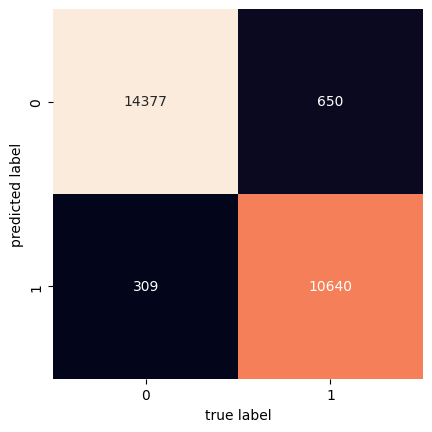

In [44]:
#train the model with random forest
params_rf = {}

model_rf = RandomForestClassifier(**params_rf)
model_rf, roc_auc_rf = run_model(model_rf, train_clean, y_train_df, test_transformed, y_test)

ROC_AUC = 0.9600568776780715
              precision    recall  f1-score   support

           0    0.95735   0.97671   0.96694     14686
           1    0.96889   0.94340   0.95598     11290

    accuracy                        0.96223     25976
   macro avg    0.96312   0.96006   0.96146     25976
weighted avg    0.96237   0.96223   0.96217     25976



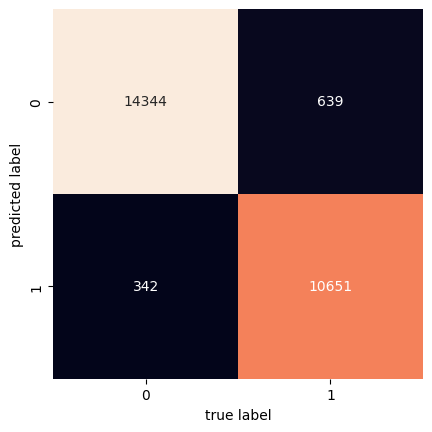

In [45]:
#train the model with xgboost
params_xgb ={}

model_xgb = xgb.XGBClassifier(**params_xgb)
roc_auc_xgb = run_model(model_xgb, train_clean, y_train_df, test_transformed, y_test)

ROC_AUC = 0.9222906687822451
              precision    recall  f1-score   support

           0    0.92623   0.94219   0.93414     14686
           1    0.92308   0.90239   0.91262     11290

    accuracy                        0.92489     25976
   macro avg    0.92466   0.92229   0.92338     25976
weighted avg    0.92486   0.92489   0.92479     25976



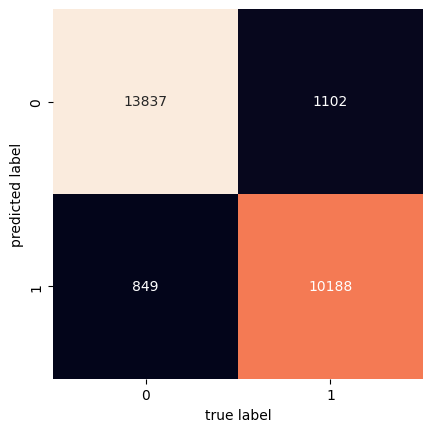

In [46]:
#train the model with adaBoost
model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada, roc_auc_ada = run_model(model_ada, train_clean, y_train_df, test_transformed, y_test)


ROC_AUC = 0.869553494606373
              precision    recall  f1-score   support

           0    0.87757   0.90297   0.89009     14686
           1    0.86884   0.83614   0.85218     11290

    accuracy                        0.87392     25976
   macro avg    0.87321   0.86955   0.87113     25976
weighted avg    0.87378   0.87392   0.87361     25976



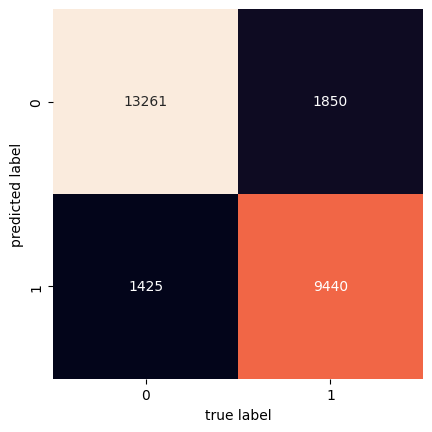

In [47]:
#train the model with logistic regression
model_lr = LogisticRegression(random_state=42)
model_lr, roc_auc_lr = run_model(model_lr, train_clean, y_train_df, test_transformed, y_test)


ROC_AUC = 0.9315526123648668
              precision    recall  f1-score   support

           0    0.92360   0.96718   0.94489     14686
           1    0.95452   0.89593   0.92429     11290

    accuracy                        0.93621     25976
   macro avg    0.93906   0.93155   0.93459     25976
weighted avg    0.93704   0.93621   0.93594     25976



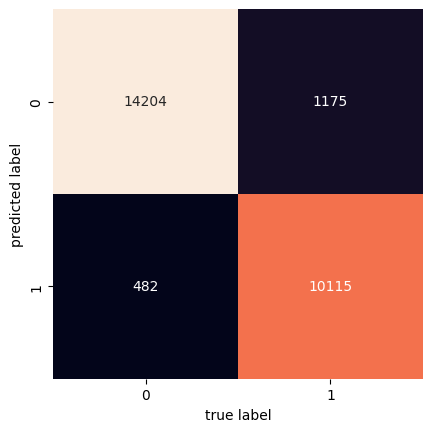

In [48]:
#train the model with KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn, roc_auc_knn = run_model(model_knn, train_clean, y_train_df, test_transformed, y_test)


ROC_AUC = 0.9533747667590604
              precision    recall  f1-score   support

           0    0.95174   0.97079   0.96117     14686
           1    0.96099   0.93596   0.94831     11290

    accuracy                        0.95565     25976
   macro avg    0.95636   0.95337   0.95474     25976
weighted avg    0.95576   0.95565   0.95558     25976



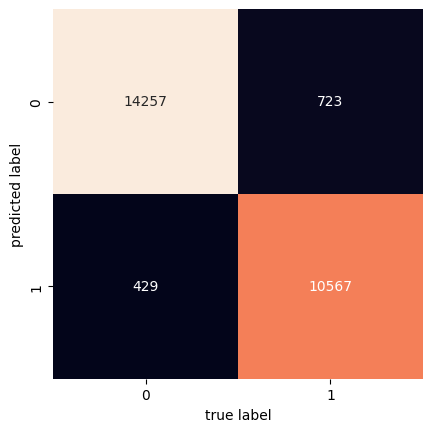

In [49]:
#train the model with SVM
model_svm = SVC(random_state=42)
model_svm, roc_auc_svm = run_model(model_svm, train_clean, y_train_df, test_transformed, y_test)

In [50]:
# compare the models roc_auc scores 
models = ['Random Forest', 'XGBoost', 'AdaBoost', 'Logistic Regression', 'KNN', 'SVM']
roc_auc_scores = [roc_auc_rf, roc_auc_xgb[1], roc_auc_ada, roc_auc_lr, roc_auc_knn, roc_auc_svm]
roc_auc_df = pd.DataFrame({'Model': models, 'ROC_AUC': roc_auc_scores})
roc_auc_df.sort_values(by='ROC_AUC', ascending=False, inplace=True)
print(roc_auc_df)


                 Model   ROC_AUC
0        Random Forest  0.960693
1              XGBoost  0.960057
5                  SVM  0.953375
4                  KNN  0.931553
2             AdaBoost  0.922291
3  Logistic Regression  0.869553


ROC_AUC = 0.921949122866906
              precision    recall  f1-score   support

           0    0.92397   0.94505   0.93439     14686
           1    0.92634   0.89885   0.91238     11290

    accuracy                        0.92497     25976
   macro avg    0.92515   0.92195   0.92339     25976
weighted avg    0.92500   0.92497   0.92483     25976

0.921949122866906


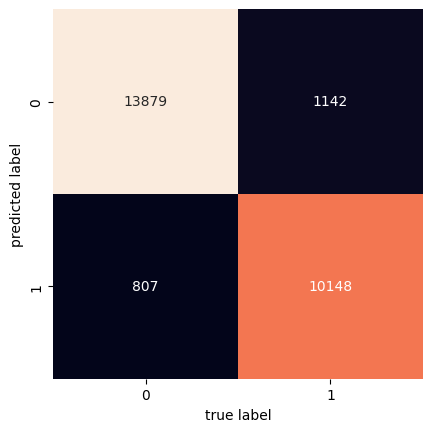

In [51]:
#run random forest with train_clean_rfe and test_transformed_rfe
params_rf_rfe = {}
model_rf_rfe = RandomForestClassifier(**params_rf_rfe)
model_rf_rfe, roc_auc_rf_rfe = run_model(model_rf_rfe, train_clean_rfe, y_train_df, test_transformed_rfe, y_test)
print(roc_auc_rf_rfe)

ROC_AUC = 0.9221666917764936
              precision    recall  f1-score   support

           0    0.92335   0.94655   0.93480     14686
           1    0.92812   0.89779   0.91270     11290

    accuracy                        0.92535     25976
   macro avg    0.92573   0.92217   0.92375     25976
weighted avg    0.92542   0.92535   0.92520     25976

0.9221666917764936


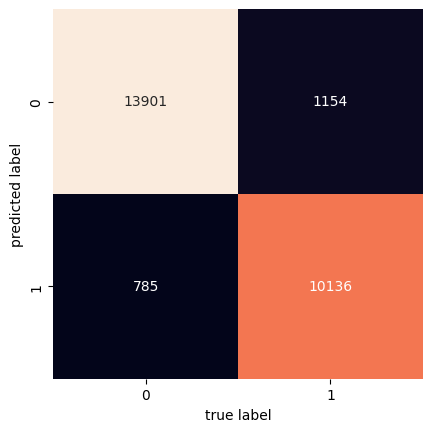

In [52]:
# run xgoost with train_clean_rfe and test_transformed_rfe
params_xgb_rfe ={}
model_xgb_rfe = xgb.XGBClassifier(**params_xgb_rfe)

model_xgb_rfe, roc_auc_xgb_rfe = run_model(model_xgb_rfe, train_clean_rfe, y_train_df, test_transformed_rfe, y_test)
print(roc_auc_xgb_rfe)


ROC_AUC = 0.840606974677594
              precision    recall  f1-score   support

           0    0.86321   0.85810   0.86065     14686
           1    0.81682   0.82312   0.81996     11290

    accuracy                        0.84289     25976
   macro avg    0.84002   0.84061   0.84030     25976
weighted avg    0.84305   0.84289   0.84296     25976

0.840606974677594


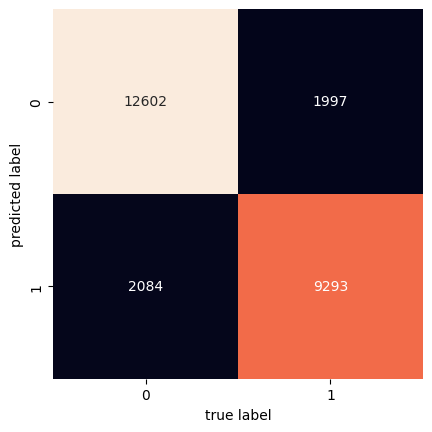

In [53]:
#train the model with logistic regression and with train_clean_rfe and test_transformed_rfe
model_lr_rfe = LogisticRegression(random_state=42)
model_lr_rfe, roc_auc_lr_rfe = run_model(model_lr_rfe, train_clean_rfe, y_train_df, test_transformed_rfe, y_test)
print(roc_auc_lr_rfe)

ROC_AUC = 0.9124229471088134
              precision    recall  f1-score   support

           0    0.91548   0.93742   0.92632     14686
           1    0.91598   0.88742   0.90148     11290

    accuracy                        0.91569     25976
   macro avg    0.91573   0.91242   0.91390     25976
weighted avg    0.91570   0.91569   0.91552     25976

0.9124229471088134


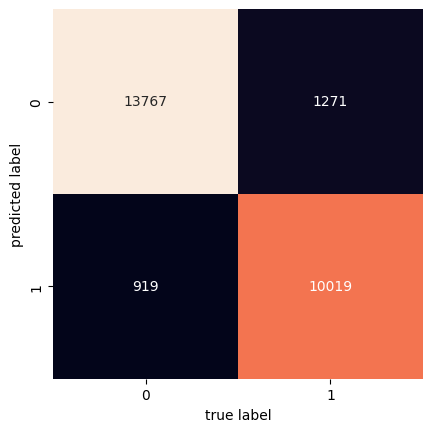

In [54]:
#run svm  with train_clean_rfe and test_transformed_rfe
model_svm_rfe = SVC(random_state=42)
model_svm_rfe, roc_auc_svm_rfe = run_model(model_svm_rfe, train_clean_rfe, y_train_df, test_transformed_rfe, y_test)
print(roc_auc_svm_rfe)

ROC_AUC = 0.8947938161552966
              precision    recall  f1-score   support

           0    0.90551   0.91359   0.90953     14686
           1    0.88628   0.87600   0.88111     11290

    accuracy                        0.89725     25976
   macro avg    0.89590   0.89479   0.89532     25976
weighted avg    0.89715   0.89725   0.89718     25976

0.8947938161552966


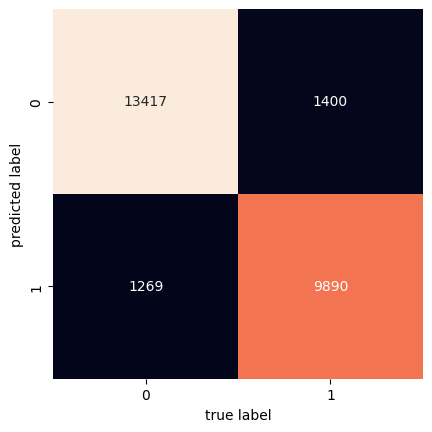

In [55]:
#run adaboost  with train_clean_rfe and test_transformed_rfe
model_ada_rfe = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada_rfe, roc_auc_ada_rfe = run_model(model_ada_rfe, train_clean_rfe, y_train_df, test_transformed_rfe, y_test)
print(roc_auc_ada_rfe)

ROC_AUC = 0.914261637801624
              precision    recall  f1-score   support

           0    0.92304   0.92932   0.92617     14686
           1    0.90724   0.89920   0.90320     11290

    accuracy                        0.91623     25976
   macro avg    0.91514   0.91426   0.91469     25976
weighted avg    0.91617   0.91623   0.91619     25976

0.914261637801624


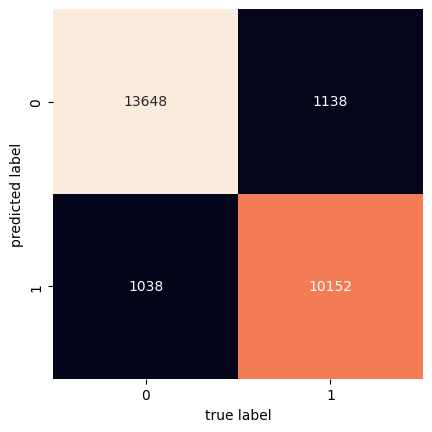

In [56]:
#run KNN  with train_clean_rfe and test_transformed_rfe
model_knn_rfe = KNeighborsClassifier(n_neighbors=5)
model_knn_rfe, roc_auc_knn_rfe = run_model(model_knn_rfe, train_clean_rfe, y_train_df, test_transformed_rfe, y_test)
print(roc_auc_knn_rfe)

In [57]:
# compare the models roc_auc scores for rfe
models = ['Random Forest', 'XGBoost', 'AdaBoost', 'Logistic Regression', 'KNN', 'SVM']
roc_auc_scores = [roc_auc_rf_rfe, roc_auc_xgb_rfe, roc_auc_ada_rfe, roc_auc_lr_rfe, roc_auc_knn_rfe, roc_auc_svm_rfe]
roc_auc_df_rfe = pd.DataFrame({'Model': models, 'ROC_AUC_RFE': roc_auc_scores})
roc_auc_df_rfe.sort_values(by='ROC_AUC_RFE', ascending=False, inplace=True)
print(roc_auc_df_rfe)

                 Model  ROC_AUC_RFE
1              XGBoost     0.922167
0        Random Forest     0.921949
4                  KNN     0.914262
5                  SVM     0.912423
2             AdaBoost     0.894794
3  Logistic Regression     0.840607


In [58]:
# merge the comparison of the models with and without rfe in a data frame with columns: Model , ROC_AUC, ROC_AUC_RFE
roc_auc_comparison = pd.merge(roc_auc_df, roc_auc_df_rfe, on='Model')
print(roc_auc_comparison)




                 Model   ROC_AUC  ROC_AUC_RFE
0        Random Forest  0.960693     0.921949
1              XGBoost  0.960057     0.922167
2                  SVM  0.953375     0.912423
3                  KNN  0.931553     0.914262
4             AdaBoost  0.922291     0.894794
5  Logistic Regression  0.869553     0.840607


### Hyperparameter Tuning

In [59]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#run grid search for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30,],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# run grid search
grid_search_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, scoring='roc_auc', n_jobs=-1, cv=3)
grid_search_rf.fit(train_clean, y_train_df)
print(grid_search_rf.best_params_)



{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


ROC_AUC = 0.9617046512606922
              precision    recall  f1-score   support

           0    0.95737   0.98019   0.96864     14686
           1    0.97340   0.94322   0.95807     11290

    accuracy                        0.96412     25976
   macro avg    0.96538   0.96170   0.96336     25976
weighted avg    0.96434   0.96412   0.96405     25976

0.9617046512606922


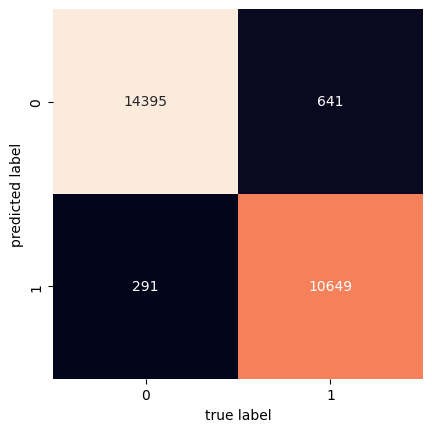

In [60]:
# run random forest with the parameters from the grid search
params_rf_grid = grid_search_rf.best_params_
model_rf_grid = RandomForestClassifier(**params_rf_grid)
model_rf_grid, roc_auc_rf_grid = run_model(model_rf_grid, train_clean, y_train_df, test_transformed, y_test)
print(roc_auc_rf_grid)


In [61]:
#compare the roc_auc scores of random forest models
models_rf = ['Random Forest', 'Random Forest RFE', 'Random Forest Grid Search']
roc_auc_scores_rf = [roc_auc_rf, roc_auc_rf_rfe, roc_auc_rf_grid]
roc_auc_df_rf = pd.DataFrame({'Model': models_rf, 'ROC_AUC': roc_auc_scores_rf})
roc_auc_df_rf.sort_values(by='ROC_AUC', ascending=False, inplace=True)
print(roc_auc_df_rf)


                       Model   ROC_AUC
2  Random Forest Grid Search  0.961705
0              Random Forest  0.960693
1          Random Forest RFE  0.921949


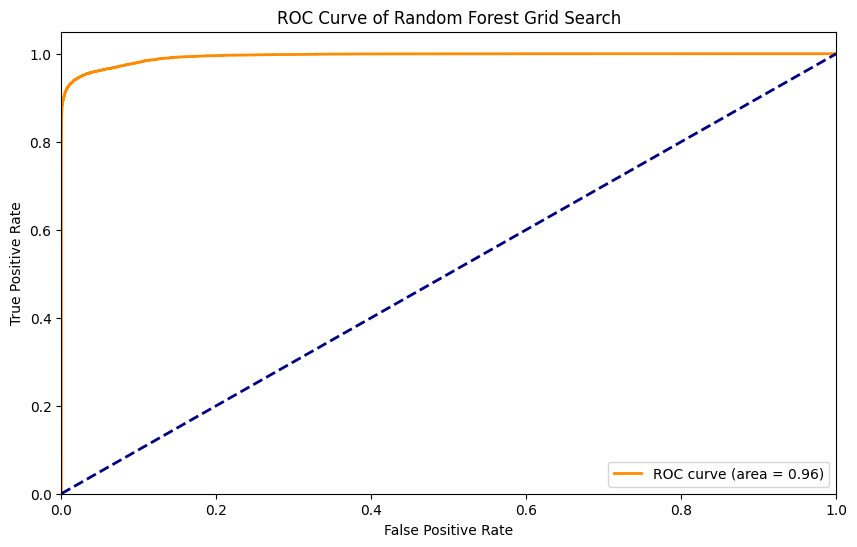

In [64]:
#draw the roc_auc curve of random forest grid search
from sklearn.metrics import roc_curve
y_pred_rf_grid = model_rf_grid.predict_proba(test_transformed)[:, 1]
fpr_rf_grid, tpr_rf_grid, _ = roc_curve(y_test, y_pred_rf_grid)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_grid, tpr_rf_grid, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf_grid)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest Grid Search')
plt.legend(loc="lower right")
plt.show()
